In [187]:
#importing the libraries
import numpy as np
from numpy import int64
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [188]:
#importing the mpesa data and viewing the first 5 rows
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

df.head()


,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,LB84183C7I,2/8/2017 10:02,Customer Transfer of Funds Charge,Completed,NaN,40.0,741.75
1,LB84183C7I,2/8/2017 10:02,Customer Transfer to 25470000000,Completed,NaN,2000.0,781.75
2,LB86182XDE,2/8/2017 10:01,Customer Transfer of Funds Charge,Completed,NaN,85.0,2781.75
3,LB86182XDE,2/8/2017 10:01,Customer Transfer to 25470000000,Completed,NaN,10000.0,2866.75
4,LB8217YNY8,2/8/2017 9:52,Withdrawal Charge,Completed,NaN,66.0,12866.75


In [189]:
df.dtypes

Receipt No.            object
Completion Time        object
Details                object
Transaction Status     object
Paid In               float64
Withdrawn             float64
Balance               float64
dtype: object

In [190]:
#filling null with 0
df['Paid In'] = df['Paid In'].fillna(0).astype(np.int64)
df['Withdrawn'] = df['Withdrawn'].fillna(0).astype(np.int64)

In [191]:
df.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,LB84183C7I,2/8/2017 10:02,Customer Transfer of Funds Charge,Completed,0,40,741.75
1,LB84183C7I,2/8/2017 10:02,Customer Transfer to 25470000000,Completed,0,2000,781.75
2,LB86182XDE,2/8/2017 10:01,Customer Transfer of Funds Charge,Completed,0,85,2781.75
3,LB86182XDE,2/8/2017 10:01,Customer Transfer to 25470000000,Completed,0,10000,2866.75
4,LB8217YNY8,2/8/2017 9:52,Withdrawal Charge,Completed,0,66,12866.75


In [192]:
df['Completion Time']= pd.to_datetime(df['Completion Time'])
df['Details'] = df['Details'].astype(str)
df['Paid In'] = df['Paid In'].astype(int64)
df['Withdrawn'] = df['Withdrawn'].astype(int64)
df['Balance'] = df['Balance'].astype(int64)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [193]:
df.dtypes

Receipt No.                   object
Completion Time       datetime64[ns]
Details                       object
Transaction Status            object
Paid In                        int64
Withdrawn                      int64
Balance                      float64
dtype: object

In [194]:
#sorting values using date dataframe
df=df.sort_values(by=['Completion Time'])


In [195]:
#Filtering the Amount used to pay bills through MPESA
matchers = 'Pay Bill Charge'
df['PBC rows'] = df['Details'].str.find(matchers)

In [196]:
df1 = df[df['PBC rows'] == 0]

In [197]:
df1.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,PBC rows
41,LAI3TJSW6T,2017-01-18 11:54:00,Pay Bill Charge,Completed,0,198,802.00,0
38,LAL3UKA323,2017-01-21 15:56:00,Pay Bill Charge,Completed,0,22,193.00,0
32,LAQ8VX4QYA,2017-01-26 00:14:00,Pay Bill Charge,Completed,0,22,2398.75,0
30,LAQ2W7B34K,2017-01-26 21:39:00,Pay Bill Charge,Completed,0,22,186.75,0
29,LAR2WDTYIG,2017-01-27 15:57:00,Pay Bill Charge,Completed,0,22,164.75,0


In [114]:
print('Total amount is:', df1['Withdrawn'].sum())
print('Highest amount is:', df1['Withdrawn'].max())
print('Lowest amount is:', df1['Withdrawn'].min())
print('Average amount is:', df1['Withdrawn'].mean())
print('Median amount is:', df1['Withdrawn'].median())
print('Mode amount is:', df1['Withdrawn'].mode())

Total amount is: 2551
Highest amount is: 198
Lowest amount is: 5
Average amount is: 28.662921348314608
Median amount is: 22.0
Mode amount is: 0    22
dtype: int64


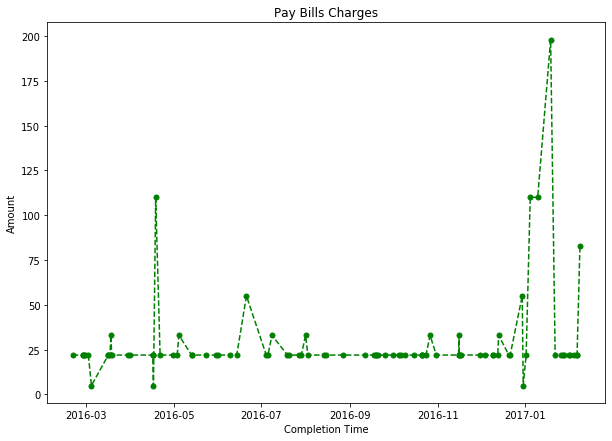

In [182]:
plt.figure(figsize=(10,7))

plt.title('Pay Bills Charges')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot (df1['Completion Time'], df1.Withdrawn,  color='green', marker='.', markersize=10, linestyle='--')


plt.show()

In [116]:
#saving to a csv file
df1.to_csv("Pay_Bill_Charge.csv",index = False)

In [117]:
#Filtering the Amount used to Withdraw Money through MPESA
matchers = 'Withdrawal Charge'
df['WC rows'] = df['Details'].str.find(matchers)

In [118]:
df2 = df[df['WC rows'] == 0]

In [119]:
print('Total amount is:', df2['Withdrawn'].sum())
print('Highest amount is:', df2['Withdrawn'].max())
print('Lowest amount is:', df2['Withdrawn'].min())
print('Average amount is:', df2['Withdrawn'].mean())
print('Median amount is:', df2['Withdrawn'].median())
print('Mode amount is:', df2['Withdrawn'].mode())

Total amount is: 13956
Highest amount is: 330
Lowest amount is: 27
Average amount is: 54.72941176470588
Median amount is: 27.0
Mode amount is: 0    27
dtype: int64


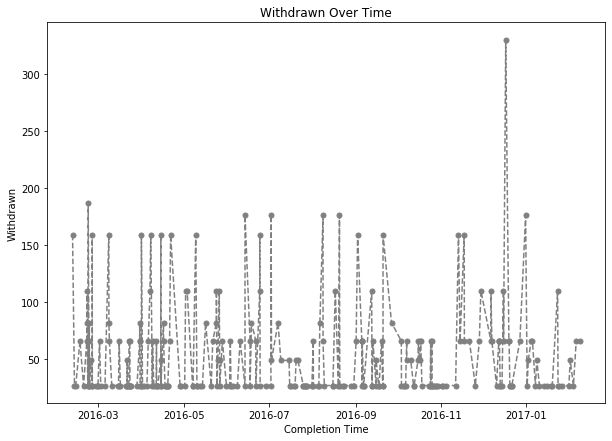

In [120]:
plt.figure(figsize=(10,7))

plt.title('Withdrawn Over Time')
plt.xlabel('Completion Time')
plt.ylabel('Withdrawn')

plt.plot (df2['Completion Time'], df2.Withdrawn,  color='grey', marker='.', markersize=10, linestyle='--')

#plt.xticks(df1['Completion Time'][::10].tolist())

plt.show()

In [121]:
#Filtering the Amount used to Transfer Funds through MPESA
matchers = 'Customer Transfer of'
df['CTF rows'] = df['Details'].str.find(matchers)

In [122]:
df3 = df[df['CTF rows'] == 0]

In [123]:
print('Total amount is:', df3['Withdrawn'].sum())
print('Highest amount is:', df3['Withdrawn'].max())
print('Lowest amount is:', df3['Withdrawn'].min())
print('Average amount is:', df3['Withdrawn'].mean())
print('Median amount is:', df3['Withdrawn'].median())
print('Mode amount is:', df3['Withdrawn'].mode())

Total amount is: 12747
Highest amount is: 110
Lowest amount is: 3
Average amount is: 44.260416666666664
Median amount is: 40.0
Mode amount is: 0    60
dtype: int64


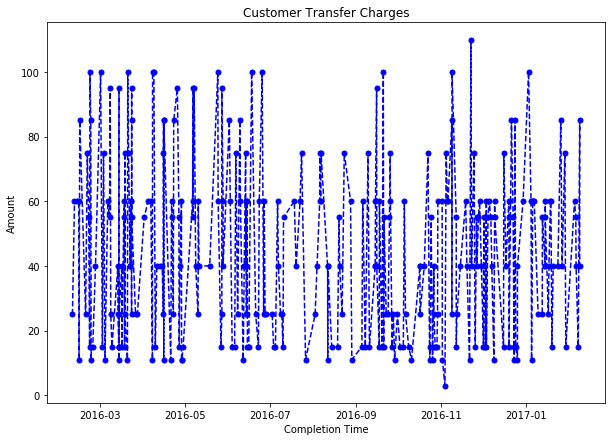

In [184]:
plt.figure(figsize=(10,7))

plt.title('Customer Transfer Charges')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot (df3['Completion Time'], df3.Withdrawn,  color='blue', marker='.', markersize=10, linestyle='--')

plt.show()

In [125]:
#Filtering the Amount used to Transfer Funds when Paying for Merchant through MPESA
matchers = 'Pay Merchant Charge'
df['PMC rows'] = df['Details'].str.find(matchers)

In [126]:
df4 = df[df['PMC rows'] == 0]

In [127]:
print('Total amount is:', df4['Withdrawn'].sum())
print('Highest amount is:', df4['Withdrawn'].max())
print('Lowest amount is:', df4['Withdrawn'].min())
print('Average amount is:', df4['Withdrawn'].mean())
print('Median amount is:', df4['Withdrawn'].median())
print('Mode amount is:', df4['Withdrawn'].mode())

Total amount is: 717
Highest amount is: 64
Lowest amount is: 0
Average amount is: 23.9
Median amount is: 23.5
Mode amount is: 0    25
dtype: int64


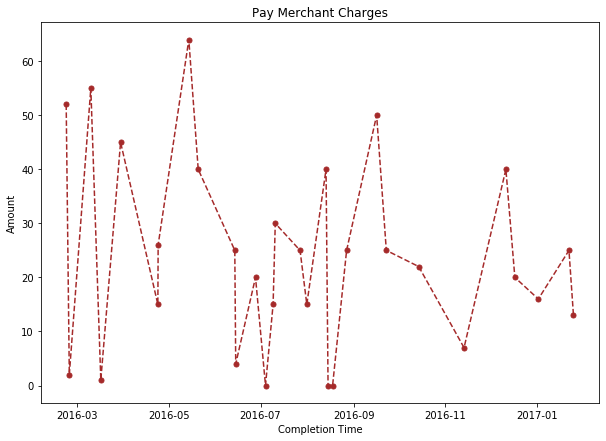

In [186]:
plt.figure(figsize=(10,7))

plt.title('Pay Merchant Charges')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot (df4['Completion Time'], df4.Withdrawn,  color='brown', marker='.', markersize=10, linestyle='--')

#plt.xticks(df1['Completion Time'][::10].tolist())

plt.show()

In [129]:
#Filtering the Amount used to pay bills through MPESA
matchers = 'Pay Bill to'
df['PBT rows'] = df['Details'].str.find(matchers)

In [130]:
df5 = df[df['PBT rows'] == 0]

In [131]:
print('Total amount is:', df5['Withdrawn'].sum())
print('Highest amount is:', df5['Withdrawn'].max())
print('Lowest amount is:', df5['Withdrawn'].min())
print('Average amount is:', df5['Withdrawn'].mean())
print('Median amount is:', df5['Withdrawn'].median())
print('Mode amount is:', df5['Withdrawn'].mode())

Total amount is: 228888
Highest amount is: 45500
Lowest amount is: 50
Average amount is: 2288.88
Median amount is: 1000.0
Mode amount is: 0    2000
dtype: int64


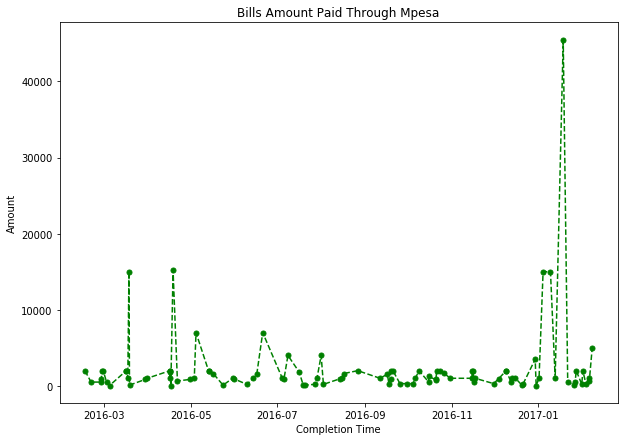

In [132]:
plt.figure(figsize=(10,7))

plt.title('Bills Amount Paid Through Mpesa')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot (df5['Completion Time'], df5.Withdrawn,  color='green', marker='.', markersize=10, linestyle='--')


plt.show()

In [133]:
#Filtering the Amount used to pay tokens through MPESA
matchers = 'Pay Bill to 888880'
df['tokens rows'] = df['Details'].str.find(matchers)

In [134]:
tkn = df[df['tokens rows'] == 0]

In [135]:
#tokens bought analysis
print('Total amount is:', tkn['Withdrawn'].sum())
print('Highest amount is:', tkn['Withdrawn'].max())
print('Lowest amount is:', tkn['Withdrawn'].min())
print('Average amount is:', tkn['Withdrawn'].mean())
print('Median amount is:', tkn['Withdrawn'].median())
print('Mode amount is:', tkn['Withdrawn'].mode())

Total amount is: 17300
Highest amount is: 1000
Lowest amount is: 300
Average amount is: 865.0
Median amount is: 1000.0
Mode amount is: 0    1000
dtype: int64


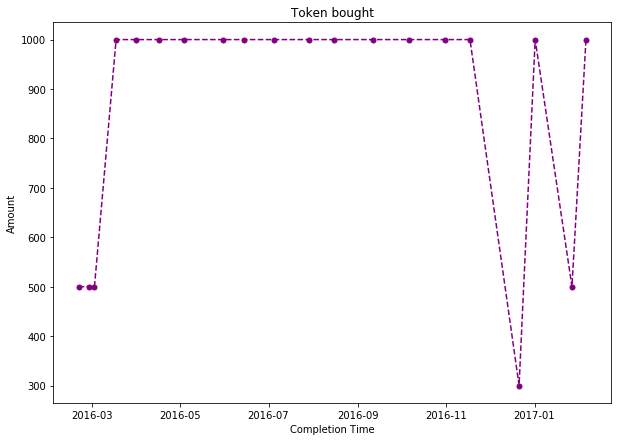

In [136]:
plt.figure(figsize=(10,7))

plt.title('Token bought')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot (tkn['Completion Time'], tkn.Withdrawn,  color='purple', marker='.', markersize=10, linestyle='--')


plt.show()

In [137]:
#Filtering the Amount send to other MPESA account
matchers = 'Customer Transfer to'
df['Kutuma rows'] = df['Details'].str.find(matchers)

In [138]:
df6 = df[df['Kutuma rows'] == 0]

In [139]:
print('Total amount Send is:', df6['Withdrawn'].sum())
print('Highest amount Send is:', df6['Withdrawn'].max())
print('Lowest amount Send is:', df6['Withdrawn'].min())
print('Average amount is:', df6['Withdrawn'].mean())
print('Median amount is:', df6['Withdrawn'].median())
print('Mode amount is:', df6['Withdrawn'].mode())

Total amount Send is: 1033781
Highest amount Send is: 30000
Lowest amount Send is: 50
Average amount is: 3564.7620689655173
Median amount is: 2015.0
Mode amount is: 0    1000
dtype: int64


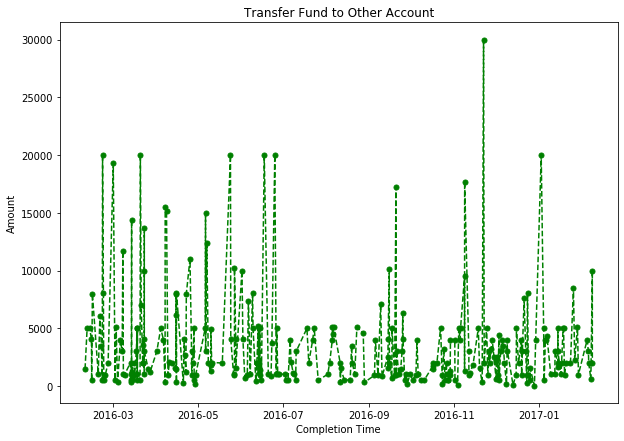

In [140]:
plt.figure(figsize=(10,7))

plt.title('Transfer Fund to Other Account')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot (df6['Completion Time'], df6.Withdrawn,  color='green', marker='.', markersize=10, linestyle='--')


plt.show()

In [141]:
#saved to csv fformat to separate phone and name from details
#df6.to_csv("Customer_Transfer_to.csv",index = False)

In [198]:
#importing csv file which i separated extenally phone and name from details

df6a = pd.read_csv('Customer_Transfer_to.csv', encoding='ISO-8859-1')

In [199]:
print('Total amount Send is:', df6a['Withdrawn'].sum())
print('Highest amount Send is:', df6a['Withdrawn'].max())
print('Lowest amount Send is:', df6a['Withdrawn'].min())
print('Average amount is:', df6a['Withdrawn'].mean())
print('Median amount is:', df6a['Withdrawn'].median())
print('Frequent Name you send money to:', df6a['Name'].mode())

Total amount Send is: 1033781
Highest amount Send is: 30000
Lowest amount Send is: 50
Average amount is: 3564.7620689655173
Median amount is: 2015.0
Frequent Name you send money to: 0    VERONICA MUCHIRI
dtype: object


In [200]:
#droping the detail column which is not needed for now
columns = ['Details' ]
df6a.drop(columns, axis=1 , inplace=True)

In [201]:
#Higstest amount Transfer to other number
df6a.nlargest(5, ['Withdrawn'])

In [202]:
#Lowest amount Transfer to other number
df6a.nsmallest(5, ['Withdrawn'])

In [148]:
#Filtering the Amount send to your MPESA Account
matchers = 'Funds received from'
df['FRF rows'] = df['Details'].str.find(matchers)

In [149]:
df7 = df[df['FRF rows'] == 0]

In [150]:
print('Total amount is:', df7['Paid In'].sum())
print('Highest amount is:', df7['Paid In'].max())
print('Lowest amount is:', df7['Paid In'].min())
print('Average amount is:', df7['Paid In'].mean())
print('Median amount is:', df7['Paid In'].median())
print('Mode amount is:', df7['Paid In'].mode())

Total amount is: 886237
Highest amount is: 53000
Lowest amount is: 10
Average amount is: 4591.901554404145
Median amount is: 2000.0
Mode amount is: 0    1000
dtype: int64


In [203]:
#Highest amount received from other number
df7.nlargest(5, ['Paid In'])

In [204]:
#Lowest amount received from other number
df7.nsmallest(5, ['Paid In'])

In [153]:
#Filtering the amount that i have withdrawn
matchers = 'Customer Withdrawal At'
df['CWA rows'] = df['Details'].str.find(matchers)

In [154]:
df8 = df[df['CWA rows'] == 0]

In [155]:
print('Total amount is:', df8['Withdrawn'].sum())
print('Highest amount is:', df8['Withdrawn'].max())
print('Lowest amount is:', df8['Withdrawn'].min())
print('Average amount is:', df8['Withdrawn'].mean())
print('Median amount is:', df8['Withdrawn'].median())
print('Mode amount is:', df8['Withdrawn'].mode())

Total amount is: 988200
Highest amount is: 70000
Lowest amount is: 150
Average amount is: 3875.294117647059
Median amount is: 2000.0
Mode amount is: 0    5000
dtype: int64


In [156]:
#Filtering the amount i have deposited 
matchers = 'Deposit of Funds at Agent'
df['Deposit rows'] = df['Details'].str.find(matchers)

In [157]:
df9 = df[df['Deposit rows'] == 0]

In [158]:
print('Total amount is:', df9['Paid In'].sum())
print('Highest amount is:', df9['Paid In'].max())
print('Lowest amount is:', df9['Paid In'].min())
print('Average amount is:', df9['Paid In'].mean())
print('Median amount is:', df9['Paid In'].median())
print('Mode amount is:', df9['Paid In'].mode())

Total amount is: 772900
Highest amount is: 57500
Lowest amount is: 100
Average amount is: 5187.248322147651
Median amount is: 2350.0
Mode amount is: 0    1000
dtype: int64


In [159]:
# Filtering the loan amount i have taken with m-shwari
matchers = 'M-Shwari Loan Disburse'
df['Loan rows'] = df['Details'].str.find(matchers)

In [160]:
dfloan = df[df['Loan rows'] == 0]

In [161]:
print('Total amount is:', dfloan['Paid In'].sum())
print('Highest amount is:', dfloan['Paid In'].max())
print('Lowest amount is:', dfloan['Paid In'].min())
print('Average amount is:', dfloan['Paid In'].mean())
print('Median amount is:', dfloan['Paid In'].median())
print('Mode amount is:', dfloan['Paid In'].mode())

Total amount is: 150000
Highest amount is: 15000
Lowest amount is: 15000
Average amount is: 15000.0
Median amount is: 15000.0
Mode amount is: 0    15000
dtype: int64


In [162]:
# Filtering the loan amount i have repaid with m-shwari
matchers = 'M-Shwari Loan Repayment'
df['Repayment rows'] = df['Details'].str.find(matchers)

In [163]:
dfrey = df[df['Repayment rows'] == 0]

In [164]:
print('Total amount is:', dfrey['Withdrawn'].sum())
print('Highest amount is:', dfrey['Withdrawn'].max())
print('Lowest amount is:', dfrey['Withdrawn'].min())
print('Average amount is:', dfrey['Withdrawn'].mean())
print('Median amount is:', dfrey['Withdrawn'].median())
print('Mode amount is:', dfrey['Withdrawn'].mode())

Total amount is: 163447
Highest amount is: 17247
Lowest amount is: 1500
Average amount is: 12572.846153846154
Median amount is: 16125.0
Mode amount is: 0    16125
dtype: int64


In [165]:
# Filtering the loan amount i have taken with KCB M-pESA
matchers = 'KCB M-PESA Withdraw'
df['KCBW rows'] = df['Details'].str.find(matchers)

In [166]:
dfKCBW = df[df['KCBW rows'] == 0]

In [167]:
print('Total amount is:', dfKCBW['Paid In'].sum())
print('Highest amount is:', dfKCBW['Paid In'].max())
print('Lowest amount is:', dfKCBW['Paid In'].min())
print('Average amount is:', dfKCBW['Paid In'].mean())
print('Median amount is:', dfKCBW['Paid In'].median())
print('Mode amount is:', dfKCBW['Paid In'].mode())

Total amount is: 79820
Highest amount is: 12650
Lowest amount is: 5000
Average amount is: 9977.5
Median amount is: 10400.0
Mode amount is: 0    12500
dtype: int64


In [168]:
# Filtering the loan amount i have repaid with KCB M-pESA
matchers = 'KCB M-PESA Loan Repayment'
df['KCBR rows'] = df['Details'].str.find(matchers)

In [169]:
dfKCBR = df[df['KCBR rows'] == 0]

In [170]:
print('Total amount is:', dfKCBR['Withdrawn'].sum())
print('Highest amount is:', dfKCBR['Withdrawn'].max())
print('Lowest amount is:', dfKCBR['Withdrawn'].min())
print('Average amount is:', dfKCBR['Withdrawn'].mean())
print('Median amount is:', dfKCBR['Withdrawn'].median())
print('Mode amount is:', dfKCBR['Withdrawn'].mode())

Total amount is: 79300
Highest amount is: 13000
Lowest amount is: 5500
Average amount is: 9912.5
Median amount is: 8700.0
Mode amount is: 0    8700
dtype: int64


In [171]:
# Filtering the Airtime bought 
matchers = 'Airtime Purchase'
df['Airtime rows'] = df['Details'].str.find(matchers)

In [172]:
dfAir = df[df['Airtime rows'] == 0]

In [173]:
print('Total amount is:', dfAir['Withdrawn'].sum())
print('Highest amount is:', dfAir['Withdrawn'].max())
print('Lowest amount is:', dfAir['Withdrawn'].min())
print('Average amount is:', dfAir['Withdrawn'].mean())
print('Median amount is:', dfAir['Withdrawn'].median())
print('Mode amount is:', dfAir['Withdrawn'].mode())

Total amount is: 7770
Highest amount is: 500
Lowest amount is: 50
Average amount is: 114.26470588235294
Median amount is: 100.0
Mode amount is: 0    100
dtype: int64


In [179]:
# Filtering the amount used to gamble through sportpesa
matchers = 'Pay Bill to 955100'
df['SportPesa rows'] = df['Details'].str.find(matchers)


In [180]:
dfsps = df[df['SportPesa rows'] == 0]

dfsps.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,PBC rows,WC rows,CTF rows,...,Kutuma rows,FRF rows,CWA rows,Deposit rows,Loan rows,Repayment rows,KCBW rows,KCBR rows,Airtime rows,SportPesa rows
35,LB35YLT6T1,2017-02-03 13:53:00,Pay Bill to 955100 - SportPesa Acc. sport pesa,Completed,0,200,84,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0


In [181]:
print('Total amount is:', dfsps['Withdrawn'].sum())
print('Highest amount is:', dfsps['Withdrawn'].max())
print('Lowest amount is:', dfsps['Withdrawn'].min())
print('Average amount is:', dfsps['Withdrawn'].mean())
print('Median amount is:', dfsps['Withdrawn'].median())
print('Mode amount is:', dfsps['Withdrawn'].mode())

Total amount is: 200
Highest amount is: 200
Lowest amount is: 200
Average amount is: 200.0
Median amount is: 200.0
Mode amount is: 0    200
dtype: int64


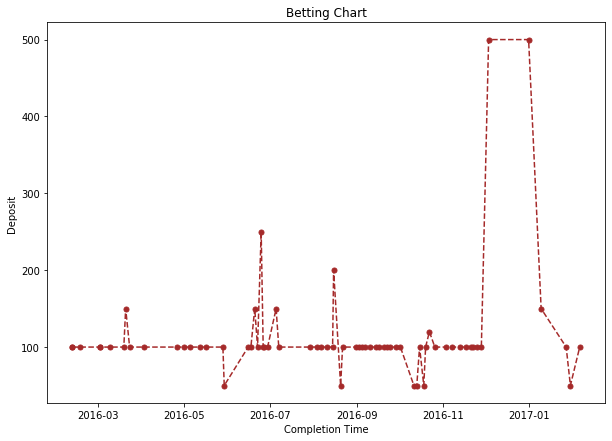

In [75]:
plt.figure(figsize=(10,7))

plt.title('Betting Chart')
plt.xlabel('Completion Time')
plt.ylabel('Deposit')

plt.plot (dfsps['Completion Time'], dfsps.Withdrawn,  color='brown', marker='.', markersize=10, linestyle='--')


plt.show()

In [76]:
#importing data for monthly total spend in paid in column and withdrawn
dfM = pd.read_csv('Monthly.csv', encoding='ISO-8859-1')

dfM.head()

,Month,Paid In,Withdrawn,Total Amount
0,February,9680,211955.0,221635.0
1,March,314020,317342.5,631362.5
2,April,276783,265246.0,542029.0
3,May,245005,248835.0,493840.0
4,June,251310,253778.0,505088.0


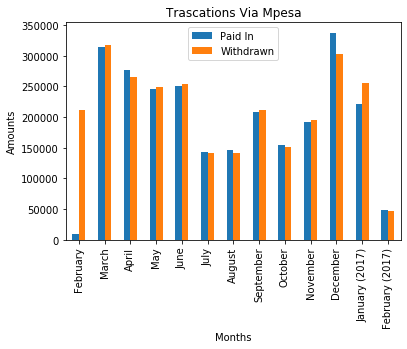

In [77]:
#ploting bar graph

dfM[['Month', 'Paid In', 'Withdrawn']].plot(x='Month', kind='bar') 

plt.title('Trascations Via Mpesa')
plt.xlabel('Months')
plt.ylabel('Amounts')


plt.show()

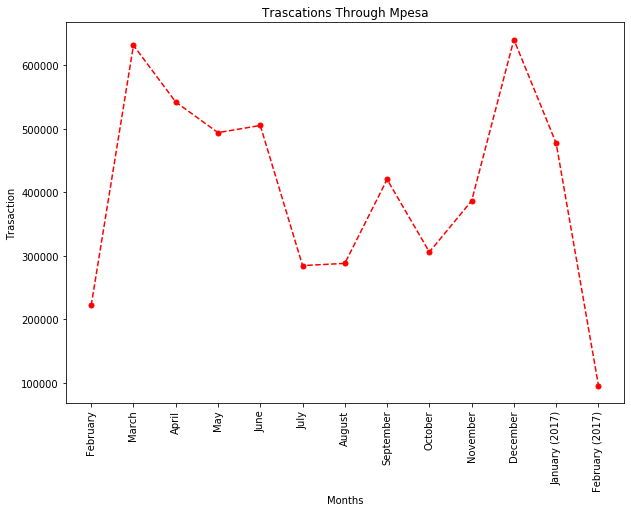

In [78]:
plt.figure(figsize=(10,7))

plt.title('Trascations Through Mpesa')
plt.xlabel('Months')
plt.ylabel('Trasaction')


plt.plot (dfM.Month, dfM['Total Amount'],  color='red', marker='.', markersize=10, linestyle='--')

plt.xticks(rotation=90)


plt.show()